In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Default figure size
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
Data = np.load('ex7data2.npz')
Data.files

['X']

### ex7data2.npz
It is a 2D Dataset. We use the K-means algorithm to cluster similar data samples together

In [4]:
X = Data['X']

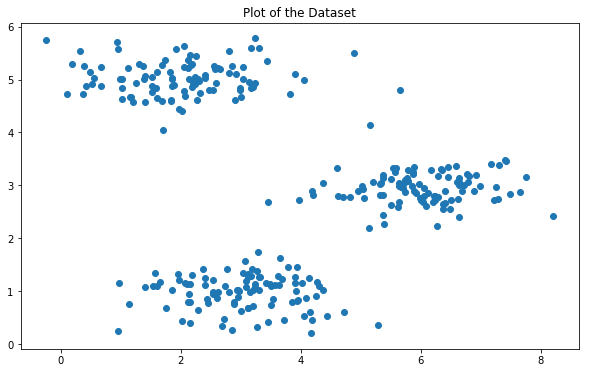

In [5]:
# Plotting the dataset
plt.scatter(X[:,0],X[:,1])
plt.title("Plot of the Dataset")
plt.show()

In [6]:
# Setting the constants for K-means
K = 3;
max_iters = 100;

In [7]:
# Intialize the cluster centroid with unique random samples from the  dataset
def initCentroids(X,k):
    flag = True
    while flag: 
        pos = np.random.choice(X.shape[0],k,replace = False)
        centroids = X[pos]
        if np.unique(centroids,axis =0).shape[0] == k :
            flag = False
    return centroids

In [8]:
# Cluster Assignment
def closestCentroids(X,centroids):
    idx = np.empty(X.shape[0])
    for i in range(idx.size):
        temp = X[i]
        c = np.sum((centroids - temp) **2,axis=1)
        pos = np.argmin(c)
        idx[i] = pos
    return idx

In [9]:
# Move Centroid
def computeCentroids(X,idx,k):
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        pos = np.nonzero(idx == i)
        centroids[i] = np.mean(X[pos],axis =0)
    return centroids 

In [10]:
# K-means Function
def kMeans(X,init_c,max_iters):
    centroids= init_c
    k = init_c.shape[0]
    idx = np.empty(X.shape[0])
    for i in range(max_iters):
    # Cluster Assignment step
        idx = closestCentroids(X,centroids)
    # Move Centroid Step
        centroids = computeCentroids(X,idx,k)
    
    return centroids

In [11]:
# Randomly intializing cluster centroid from the dataset
init_c = initCentroids(X,K)
init_c

array([[4.61652442, 2.79320715],
       [3.23197916, 4.93989405],
       [2.88384005, 0.80454506]])

In [12]:
# Calling K-means to compute centroids and centroid assignments
centroids = kMeans(X,init_c,max_iters)
idx = closestCentroids(X,centroids)

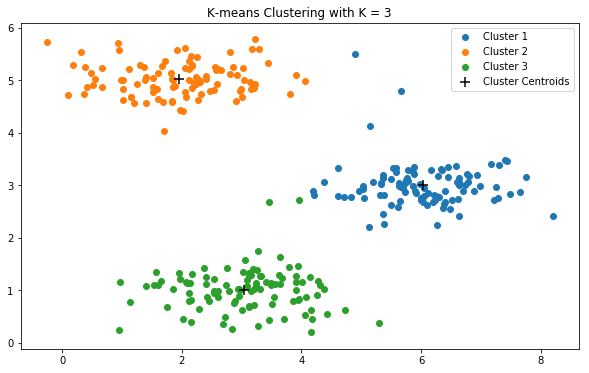

In [13]:
# Plotting the output of K-means clustering, with colors representing different clusters 
for i in range(K):
    pos = np.nonzero(idx == i)
    plt.scatter(X[pos,0],X[pos,1],label="Cluster %d" %(i+1))
plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='+',s=100,label='Cluster Centroids')
plt.legend(loc='best')
plt.title("K-means Clustering with K = %d" %K)
plt.show()

## Image compression with K-means

(128, 128, 3)


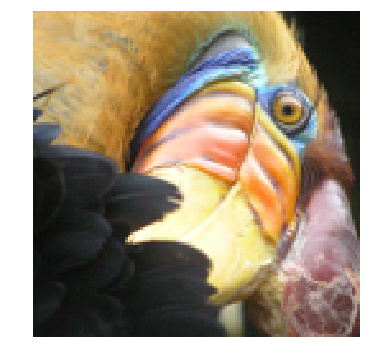

In [14]:
A = plt.imread('bird_small.png')
print A.shape
plt.imshow(A)
plt.axis('off')
plt.show()

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, we will reduce the number of colors to 16 colors.

We treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once we compute the cluster centroids on the image, we will then use the 16 colors to replace the pixels in the original image.

In [15]:
# Setting the constants for K-means
K = 16;
max_iters = 100;

#### Reshaping the image to m x3 matrix of pixel colors (where m = 128 x 128 = 16384) and then progressing to K-means

In [16]:
img = A.reshape(-1,3)
img.shape

(16384, 3)

In [17]:
# Randomly intializing cluster centroid from the dataset
init_c = initCentroids(img,K)

In [18]:
# Calling K-means to compute centroids and centroid assignments
centroids = kMeans(img,init_c,max_iters)
idx = closestCentroids(img,centroids)

In [19]:
# Assigning the pixel values of the new image to their cluster centroid values 
idx = idx.astype(int)
img_compress = centroids[idx]

In [20]:
# Reshaping ot back to 128*128*3
img_compress = img_compress.reshape(A.shape)

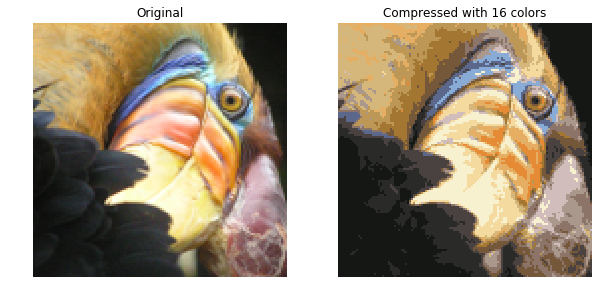

In [21]:
# Plotting both the original and compressed image
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Original')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_compress)
plt.title('Compressed with 16 colors')
plt.axis("off")
plt.show()

The original image required 24 bits for each one of the 128×128 pixel locations, resulting in total size of 128 × 128 × 24 = 393, 216 bits. The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require
24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore 16 × 24 + 128 × 128 × 4 = 65, 920 bits, which corresponds to compressing the original image by about a factor of 6. Hence we have significantly compressed the image.  
  
Even though the resulting image retains most of the characteristics of the original, we also see some compression
artifacts.